Title - Implementing regression using deep neural network.

Introduction:
Regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. In this lab, we explore how deep neural networks (DNNs) can be leveraged for regression tasks. DNNs are a class of artificial neural networks with multiple hidden layers, making them capable of learning complex non-linear relationships in the data.

Neural Network Architecture:
The DNN architecture for regression typically consists of an input layer, one or more hidden layers, and an output layer. The input layer takes the feature values, and each hidden layer applies nonlinear transformations to the inputs. The final hidden layer connects to the output layer, which produces the continuous predictions for the regression task. The number of neurons in the hidden layers, as well as their activation functions, play crucial roles in determining the network's expressiveness and generalization capability.

Loss Function:
For regression tasks, the Mean Squared Error (MSE) or Mean Absolute Error (MAE) is commonly used as the loss function. The MSE measures the average squared difference between predicted and actual values, penalizing large errors heavily. On the other hand, the MAE calculates the average absolute difference, which is less sensitive to outliers. The choice of loss function depends on the specific problem and desired behavior of the model.

Activation Functions:
Activation functions introduce nonlinearity to the model and allow it to approximate complex functions. Commonly used activation functions for regression include the Rectified Linear Unit (ReLU), which is computationally efficient and helps alleviate the vanishing gradient problem, and the hyperbolic tangent (tanh) function, which squashes values between -1 and 1. Choosing appropriate activation functions ensures stable training and better convergence.

Training Data and Validation Split:
To train and evaluate the regression DNN, the dataset is divided into training and validation sets. The training set is used to update the model's parameters during the learning process, while the validation set helps assess the model's performance on unseen data. The validation set aids in preventing overfitting, where the model becomes too specialized to the training data and fails to generalize to new instances.

Optimization Algorithm:
Stochastic Gradient Descent (SGD) and its variants, such as Adam and RMSprop, are commonly employed optimization algorithms for training DNNs. These algorithms iteratively update the network's weights to minimize the chosen loss function. Their adaptive learning rates and momentum terms enhance the training process and enable convergence to an optimal solution.

Regularization Techniques:
To prevent overfitting, regularization techniques can be applied. L1 and L2 regularization add penalty terms to the loss function based on the magnitudes of the model's weights, encouraging smaller weights. Dropout, a technique that randomly drops neurons during training, forces the network to learn redundant representations, increasing robustness.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [ ]:
# Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
# Normalize the data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [ ]:
# Build the model with regularization
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.001))

In [ ]:
# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=0, callbacks=[early_stop])

Epoch 31: early stopping


In [ ]:
# Evaluate the model
mse = model.evaluate(x_test, y_test)
print('Mean squared error:', mse)

4/4 [==============================] - 0s 5ms/step - loss: 22.5879
Mean squared error: 22.58786964416504


In [ ]:
# Make predictions
predictions = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# Show the first 10 predictions and corresponding actual values
for i in range(10):
    print('Predicted value:', predictions[i][0], 'Actual value:', y_test[i])

Predicted value: 9.413518 Actual value: 7.2
Predicted value: 17.719044 Actual value: 18.8
Predicted value: 21.439072 Actual value: 19.0
Predicted value: 32.478188 Actual value: 27.0
Predicted value: 25.279858 Actual value: 22.2
Predicted value: 18.761839 Actual value: 24.5
Predicted value: 26.704287 Actual value: 31.2
Predicted value: 21.761269 Actual value: 22.9
Predicted value: 20.367018 Actual value: 20.5
Predicted value: 24.29802 Actual value: 23.2


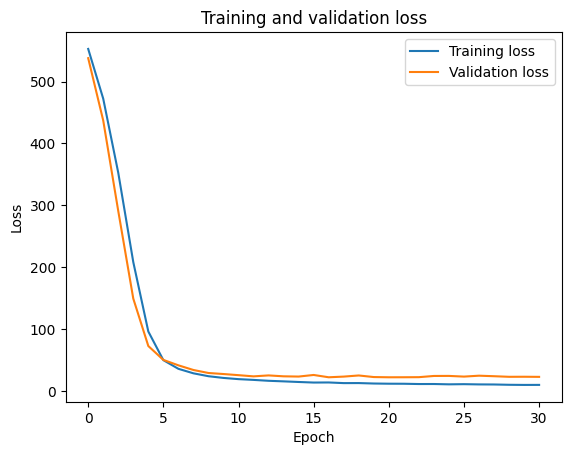

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

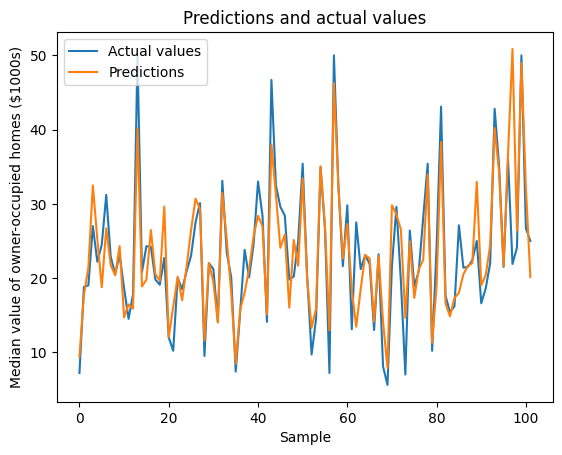

In [ ]:
# Plot the predictions and actual values
plt.plot(y_test)
plt.plot(predictions)
plt.title('Predictions and actual values')
plt.xlabel('Sample')
plt.ylabel('Median value of owner-occupied homes ($1000s)')
plt.legend(['Actual values', 'Predictions'])
plt.show()